## Time Series Prediction
Practicing time series prediction, following this [Tutorial](http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

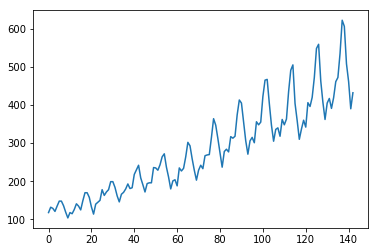

In [68]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

dataframe = pd.read_csv('international-airline-passengers.csv', usecols=[1])

plt.plot(dataframe)
plt.show()

In [69]:
np.random.seed(39)

In [70]:
dataset = dataframe.values
dataset_unscaled = dataset
dataset = dataset.astype('float32')

In [71]:
# normalizing the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [72]:
# split into train / test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [73]:
# create dataset matrix
def create_dataset(dataset, lookback=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback - 1):
        a = dataset[i:i+lookback,0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX), np.array(dataY)

create_dataset(dataset_unscaled, 2)

(array([[118, 132],
        [132, 129],
        [129, 121],
        [121, 135],
        [135, 148],
        [148, 148],
        [148, 136],
        [136, 119],
        [119, 104],
        [104, 118],
        [118, 115],
        [115, 126],
        [126, 141],
        [141, 135],
        [135, 125],
        [125, 149],
        [149, 170],
        [170, 170],
        [170, 158],
        [158, 133],
        [133, 114],
        [114, 140],
        [140, 145],
        [145, 150],
        [150, 178],
        [178, 163],
        [163, 172],
        [172, 178],
        [178, 199],
        [199, 199],
        [199, 184],
        [184, 162],
        [162, 146],
        [146, 166],
        [166, 171],
        [171, 180],
        [180, 193],
        [193, 181],
        [181, 183],
        [183, 218],
        [218, 230],
        [230, 242],
        [242, 209],
        [209, 191],
        [191, 172],
        [172, 194],
        [194, 196],
        [196, 196],
        [196, 236],
        [236, 235],


In [74]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [75]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [76]:
# Model Parameters
n_epochs = 100
batch_size = 1

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=n_epochs, batch_size=batch_size)

Epoch 1/100
92/92 [==============================] - 1s - loss: 0.0357     
Epoch 2/100
92/92 [==============================] - 0s - loss: 0.0147     
Epoch 3/100
92/92 [==============================] - 0s - loss: 0.0120     
Epoch 4/100
92/92 [==============================] - 0s - loss: 0.0109     
Epoch 5/100
92/92 [==============================] - 0s - loss: 0.0097     
Epoch 6/100
92/92 [==============================] - 0s - loss: 0.0087     
Epoch 7/100
92/92 [==============================] - 0s - loss: 0.0075     
Epoch 8/100
92/92 [==============================] - 0s - loss: 0.0065     
Epoch 9/100
92/92 [==============================] - 0s - loss: 0.0057     
Epoch 10/100
92/92 [==============================] - 0s - loss: 0.0052     
Epoch 11/100
92/92 [==============================] - 0s - loss: 0.0047     
Epoch 12/100
92/92 [==============================] - 0s - loss: 0.0041     
Epoch 13/100
92/92 [==============================] - 0s - loss: 0.0039     
Epoch 14

In [77]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 26.25 RMSE
Test Score: 54.73 RMSE


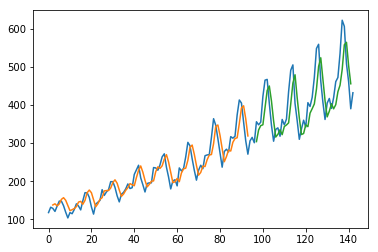

In [78]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back *2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()